In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import sent_tokenize,word_tokenize

import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mohd
[nltk_data]     Shadab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv(r"spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Missing data percentage

df.isnull().mean()*100 

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [7]:
#dropping the null columns

df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True) 

In [8]:
#Renaming the columns for better understanding

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [9]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#Check for the duplicate values

df.duplicated().sum()

403

In [11]:
#Remove duplicates

df.drop_duplicates(keep='first',inplace=True)

In [12]:
#check again for duplicates

df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

In [14]:
#Data stats

df.describe()

,Target,Text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [15]:
#Label encoding the target data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Target']=le.fit_transform(df['Target'])
df['Target'].head().to_frame()

,Target
0,0
1,0
2,1
3,0
4,0


# EDA

In [16]:
#It appears that 'ham' is the most occuring value in the dataset

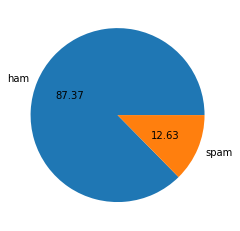

In [17]:
plt.pie(df['Target'].value_counts(),autopct='%.2f',labels=['ham','spam']);

In [18]:
#Dataset is imbalance

In [19]:
#Creating new columns in order to analyze our textual data
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
#Count the number of character in each data

df['num_char']=df['Text'].apply(len)
df[['Text','num_char']].head()

,Text,num_char
0,"Go until jurong point, crazy.. Available only ...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#Count the number of words in each message

word=[]
for x in df['Text']:
    y=len(x.split())
    word.append(y)
    
df['num_word']=word
df['num_word']
df.head()

,Target,Text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [22]:
#Count the number of sentences in each message

df['num_sent']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [23]:
#Checking the newly created columns

In [24]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.961308
std,58.236293,11.068488,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,38.000000


In [25]:
#Ham messages

df[df['Target']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.815545
std,56.358207,11.116240,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


In [26]:
#spam messages

df[df['Target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.969372
std,30.137753,5.967672,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [27]:
#1.From above observation we can clearly see that as the number of character increases the chances of it being a spam message increases.Similar trend can be seen for no. of words and no. of sentences.

#2. from above observations we can clearly see that spam messages are tend to be of higher length

In [28]:
import seaborn as sns

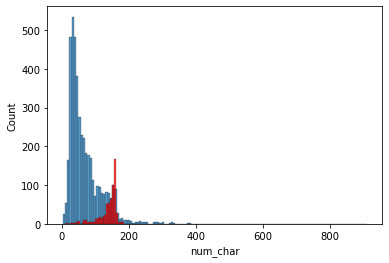

In [29]:
sns.histplot(df[df['Target']==0]['num_char'])
sns.histplot(df[df['Target']==1]['num_char'],color='red');

In [30]:
#Spam messages generally contains more character then ham

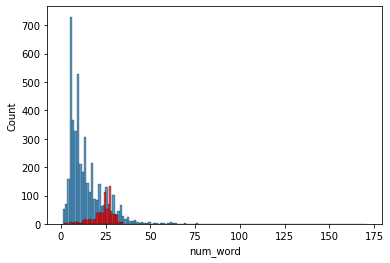

In [31]:
sns.histplot(df[df['Target']==0]['num_word'])
sns.histplot(df[df['Target']==1]['num_word'],color='red');

In [32]:
#spam messages generally contains more words than ham.
#spam messages are generally longer than spam messages

<AxesSubplot:>

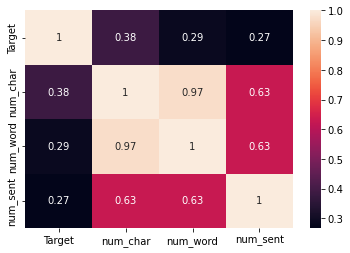

In [33]:
#Let's check the correlation among the created variables

sns.heatmap(df.corr(),annot=True)

In [34]:
#1. num_char shows better variation with the target column.
#2. Presence of high multi-collinearity among the input variables may cause a bad result so keeping only num_char

In [35]:
df.drop(['num_word','num_sent'],axis=1,inplace=True)

In [36]:
df

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


# Data Preprocessing

1. Lowercasing
2. Tokenization
3. Removing special character
4. Removing stopwords and punctuation
5. Stemming


In [37]:
from nltk.corpus import stopwords
import string

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [41]:
df

,Target,Text,num_char,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...


In [42]:
#!pip install wordcloud

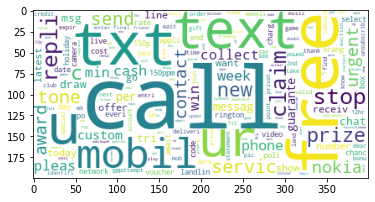

In [43]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(6,20))
plt.imshow(word_cloud);

In [44]:
#Wordcloud shows the general words that are frequently used in the spam messages

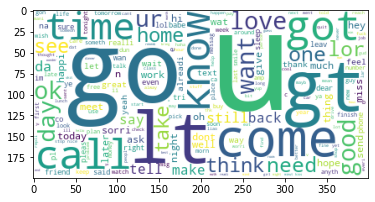

In [45]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(6,20))
plt.imshow(word_cloud);

In [46]:
#Wordcloud shows the general words that are frequently used in the ham messages

In [47]:
#Most commonly occuring words

In [48]:
spam_corpus=[]
for x in df[df['Target']==1]['transformed_text']:
    for word in x.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

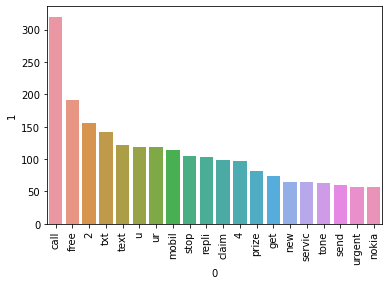

In [50]:
#3 Top 20 words in spam message

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical');

In [51]:
ham_corpus=[]
for x in df[df['Target']==0]['transformed_text']:
    for word in x.split():
        ham_corpus.append(word)

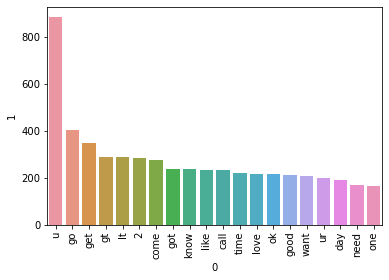

In [52]:
#3 Top 20 words in ham message

from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical');

# Text vectorization

### Bag of words

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()

In [54]:
X.shape

(5169, 6708)

In [55]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=2)

# Model building

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("Precision score",precision_score(y_test,y_pred1))

Accuracy 0.8800773694390716
[[792 104]
 [ 20 118]]
Precision score 0.5315315315315315


In [60]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("Precision score",precision_score(y_test,y_pred2))

Accuracy 0.9642166344294004
[[871  25]
 [ 12 126]]
Precision score 0.8344370860927153


In [61]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("Precision score",precision_score(y_test,y_pred3))

Accuracy 0.9700193423597679
[[893   3]
 [ 28 110]]
Precision score 0.9734513274336283


In [62]:
# bnb is working the best in terms of accuracy and precision

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
lg=LogisticRegression()
svc=SVC()
mnb=MultinomialNB()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

In [65]:
classifier=[lg,svc,mnb,dt,knn,rf,adb,bc,gbc,xgb]
name=['lg','svc','mnb','dt','knn','rf','adb','bc','gbc','xgb']

In [66]:
def classifier_(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
precision_=[]
accuracy_=[]
for clf in classifier:
    accuracy,precision= classifier_(clf,X_train,X_test,y_train,y_test)
    accuracy_.append(accuracy)
    precision_.append(precision)

In [68]:
precision_1=round(pd.DataFrame(precision_,columns=['Precision']),4)

accuracy_1=round(pd.DataFrame(accuracy_,columns=['Accuracy']),4)
name_=pd.DataFrame(name,columns=['Model'])

scores=pd.concat([name_,accuracy_1,precision_1],axis=1)
scores

,Model,Accuracy,Precision
0,lg,0.9787,0.9915
1,svc,0.9710,0.9909
2,mnb,0.9642,0.8344
3,dt,0.9555,0.8833
4,knn,0.9062,1.0000
5,rf,0.9720,0.9823
6,adb,0.9632,0.9386
7,bc,0.9565,0.9115
8,gbc,0.9584,0.9524
9,xgb,0.9778,0.9752


### Using TFIDF technique

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [70]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
y=df['Target']

In [72]:
from sklearn.model_selection import train_test_split as tts

In [73]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [75]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("Precision score",precision_score(y_test,y_pred1))

Accuracy 0.8762088974854932
[[793 103]
 [ 25 113]]
Precision score 0.5231481481481481


In [77]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("Precision score",precision_score(y_test,y_pred2))

Accuracy 0.9593810444874274
[[896   0]
 [ 42  96]]
Precision score 1.0


In [78]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("Precision score",precision_score(y_test,y_pred3))

Accuracy 0.9700193423597679
[[893   3]
 [ 28 110]]
Precision score 0.9734513274336283


In [79]:
lg=LogisticRegression()
svc=SVC()
mnb=MultinomialNB()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

classifier=[lg,svc,mnb,dt,knn,rf,adb,bc,gbc,xgb]
name=['lg','svc','mnb','dt','knn','rf','adb','bc','gbc','xgb']

def classifier_(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

precision_=[]
accuracy_=[]
for clf in classifier:
    accuracy,precision= classifier_(clf,X_train,X_test,y_train,y_test)
    accuracy_.append(accuracy)
    precision_.append(precision)
    
precision_1=round(pd.DataFrame(precision_,columns=['Precision_tfidf']),4)

accuracy_1=round(pd.DataFrame(accuracy_,columns=['Accuracy_tfidf']),4)
name_=pd.DataFrame(name,columns=['Model'])



In [80]:
score1=pd.concat([scores,accuracy_1,precision_1],axis=1)
score1

,Model,Accuracy,Precision,Accuracy_tfidf,Precision_tfidf
0,lg,0.9787,0.9915,0.9468,0.9882
1,svc,0.9710,0.9909,0.9662,0.9813
2,mnb,0.9642,0.8344,0.9594,1.0000
3,dt,0.9555,0.8833,0.9594,0.8529
4,knn,0.9062,1.0000,0.9004,1.0000
5,rf,0.9720,0.9823,0.9710,0.9821
6,adb,0.9632,0.9386,0.9613,0.9455
7,bc,0.9565,0.9115,0.9545,0.8527
8,gbc,0.9584,0.9524,0.9603,0.9292
9,xgb,0.9778,0.9752,0.9739,0.9370


In [81]:
#Since here the critical parameter is precision hence,multinomial bias gives the best result in terms of precision as well as accuracy

### Hyperparameter tuning

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param_grid={'alpha':[0.001,0.01,1,10,100,1000,10000,None]}

In [84]:
grid=RandomizedSearchCV(estimator=mnb,param_distributions=param_grid,verbose=True,cv=5,scoring='accuracy')

In [85]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.001, 0.01, 1, 10, 100, 1000,
                                                  10000, None]},
                   scoring='accuracy', verbose=True)

In [86]:
grid.best_estimator_

MultinomialNB(alpha=0.01)

In [87]:
acc=grid.best_score_ #with hyperparameter tuning accuracy is increased without precision being affected

In [88]:
grid=RandomizedSearchCV(estimator=mnb,param_distributions=param_grid,verbose=True,cv=10,scoring='precision')

In [89]:
grid.fit(X_train,y_train)
grid.best_estimator_
pre=grid.best_score_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [90]:
print("Final accepted model")
print("Accuracy",acc)
print("Precision",pre)


Final accepted model
Accuracy 0.9760580411124546
Precision 1.0


### Cross validation

In [91]:
from sklearn.model_selection import cross_val_score

sco_res = cross_val_score(mnb, X_train, y_train, cv=10).mean()
sco_res


0.955015147793335

In [92]:
#So our accuracy lies in the same range as obtained after cross validation
#Trying the accuracy with voting classifiers

### Ensemble models

In [95]:
# VOTING CLASSIFIER USING TOP PERFORMING MODELS
estimators=[('mnb',mnb),('rf',rf),('svc',svc)]
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
rf=RandomForestClassifier()

from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='soft')

vc.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [96]:
y_pred_=vc.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred_)

0.9758220502901354

In [98]:
precision_score(y_test,y_pred_)

0.991304347826087

In [99]:
#Stacking classifier
estimators=[('mnb',mnb),('rf',rf),('svc',svc)]
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
rf=RandomForestClassifier()
final_estimator=RandomForestClassifier()


In [100]:
from sklearn.ensemble import StackingClassifier

In [101]:
stack=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [102]:
stack.fit(X_train,y_train)

StackingClassifier(estimators=[('mnb', MultinomialNB()),
                               ('rf', RandomForestClassifier()),
                               ('svc',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True))],
                   final_estimator=RandomForestClassifier())

In [103]:
y_pred_=stack.predict(X_test)

In [104]:
accuracy_score(y_test,y_pred_)


0.9796905222437138

In [105]:
precision_score(y_test,y_pred_)

0.9465648854961832

In [106]:
#The accuracy have improved but the critical parameter for this problem i.e., precision score decreased.Hence considering MNB model only

In [107]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))